In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_wine
from matplotlib.colors import Normalize
from matplotlib import cm

# 加载数据集
wine = load_wine()
X = wine.data
Y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("训练集特征形状", X_train.shape)
print("测试集特征形状", X_test.shape)
print("训练集标签形状", y_train.shape)
print("测试集标签形状", y_test.shape)

# 特征和标签名称
feature_names = wine.feature_names
target_names = wine.target_names

# 创建图
plt.figure(figsize=(10, 6))

# 创建 scatter 对象
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=100)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Training Samples Scatter Plot")

# 定义 colormap 和 norm,我加入的
cmap = scatter.cmap
norm = scatter.norm

# 创建图例
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=cmap(norm(i)), markersize=10) for i in range(len(target_names))]

plt.legend(handles, target_names, title="Classes")
plt.grid()
plt.show()

nb_model = GaussianNB()
nb_model.fit(X_train, y_trainain)

nb_y_pred_proba = nb_modle.predict_proba(X_test)

accuracy  = accuracy_score(y_test,nb_y_pred)

训练集特征形状: (142, 13)
测试集特征形状: (36, 13)
训练集标签形状: (142,)
测试集标签形状: (36,)


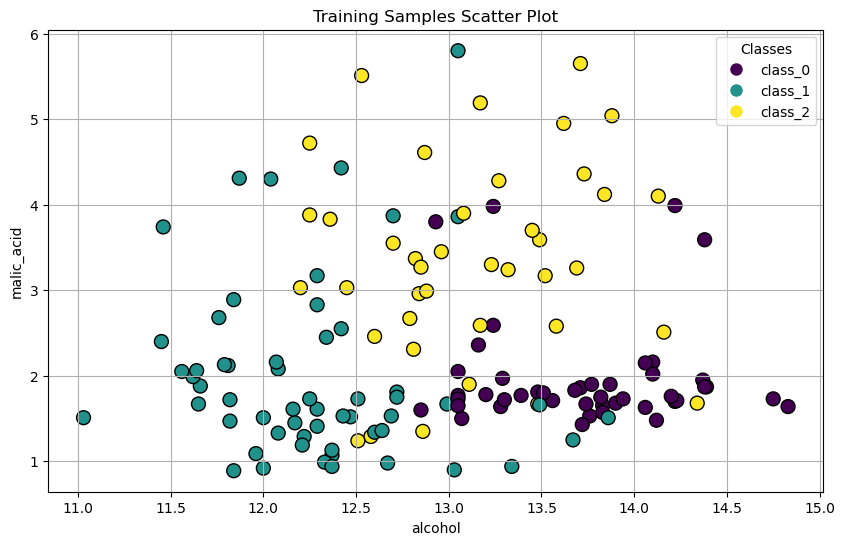

Accuracy: 1.00
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



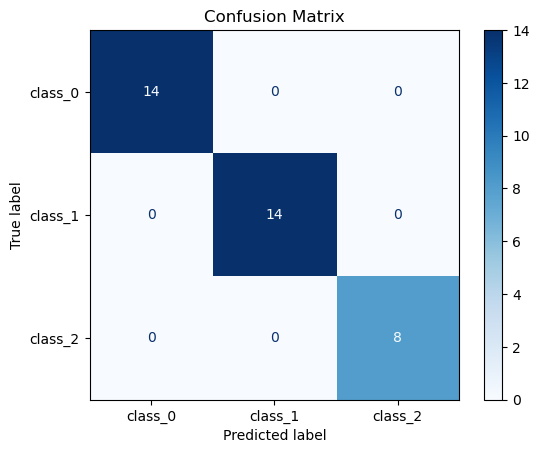

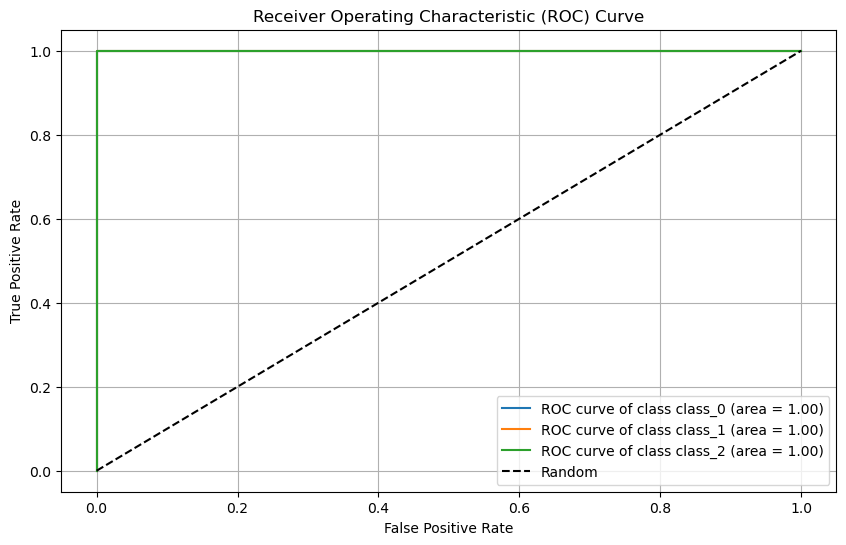

Decision Tree Accuracy: 0.94
Decision Tree Classification Report:
               precision    recall  f1-score   support

     class_0       0.93      0.93      0.93        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



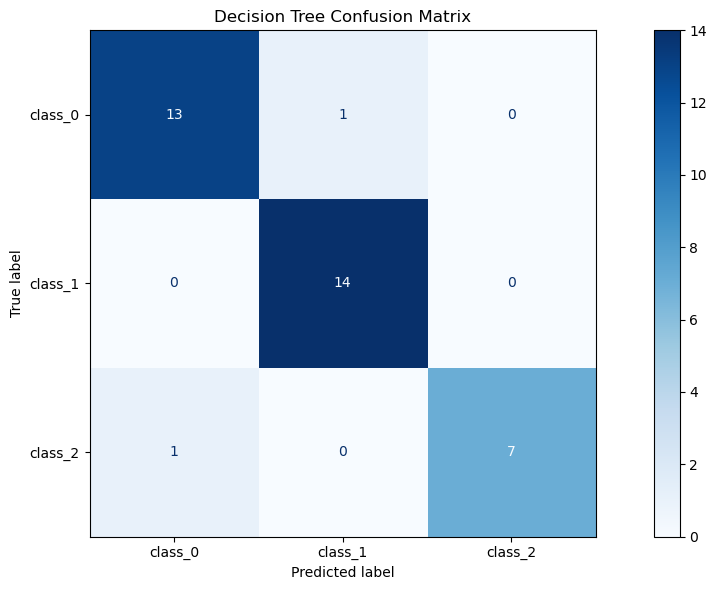

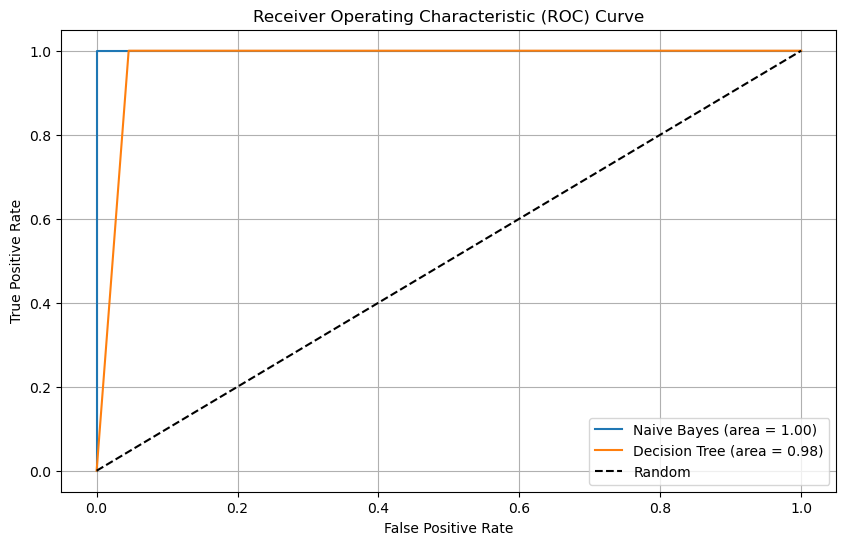

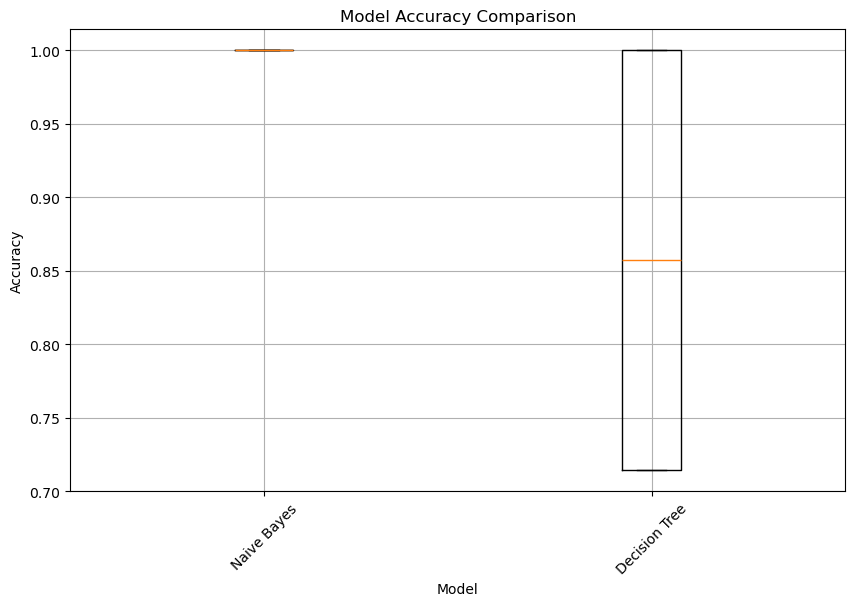

In [1]:
# 导入所需模块
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_wine

# 导入数据，分别为输入特征和标签
wine = load_wine()
X = wine.data
Y = wine.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 输出结果
print("训练集特征形状:", X_train.shape)
print("测试集特征形状:", X_test.shape)
print("训练集标签形状:", y_train.shape)
print("测试集标签形状:", y_test.shape)

# 可视化训练集样本数据分布
feature_names = wine.feature_names
target_names = wine.target_names
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=100)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Training Samples Scatter Plot')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(len(target_names))]
plt.legend(handles, target_names, title="Classes")
plt.grid()
plt.show()

# 定义和训练贝叶斯模型
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 在测试集上进行预测
nb_y_pred = nb_model.predict(X_test)

# 获取预测概率
nb_y_pred_proba = nb_model.predict_proba(X_test)

# 评估模型
accuracy = accuracy_score(y_test, nb_y_pred)
conf_matrix = confusion_matrix(y_test, nb_y_pred)
class_report = classification_report(y_test, nb_y_pred, target_names=target_names)

# 打印评价指标
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# 绘制混淆矩阵
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 绘制AUC-ROC曲线
plt.figure(figsize=(10, 6))
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(target_names)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, nb_y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制每个类别的 ROC 曲线
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {target_names[i]} (area = {roc_auc[i]:.2f})')

# 绘制随机猜测基线
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 定义并训练决策树模型
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 使用决策树进行预测
dt_pred = dt_model.predict(X_test)

# 输出模型分类结果的评价指标
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred, target_names=target_names))

# 绘制决策树的混淆矩阵
plt.figure(figsize=(12, 6))
ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix, display_labels=target_names).plot(cmap='Blues', ax=plt.gca())
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout()
plt.show()

# 比对贝叶斯分类和决策树分类的ROC曲线
dt_y_pred_proba = dt_model.predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_y_pred_proba[:, 1], pos_label=1)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_y_pred_proba[:, 1], pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# 绘制AUC-ROC曲线
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (area = {roc_auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 使用交叉验证评估不同模型的精度
import pandas as pd
from sklearn.model_selection import cross_val_score
models = {
    'Naive Bayes': nb_model,
    'Decision Tree': dt_model
}
results = []
for model_name, model in models.items():
    scores = cross_val_score(model, X_test, y_test, cv=5)
    results.append(scores)

# 将结果转换为 DataFrame 以便于绘图
results_df = pd.DataFrame(results, index=models.keys()).T

# 绘制箱线图
plt.figure(figsize=(10, 6))
plt.boxplot(results_df.values)  # 修改此处
plt.xticks([1, 2], models.keys())  # 设置x轴标签
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


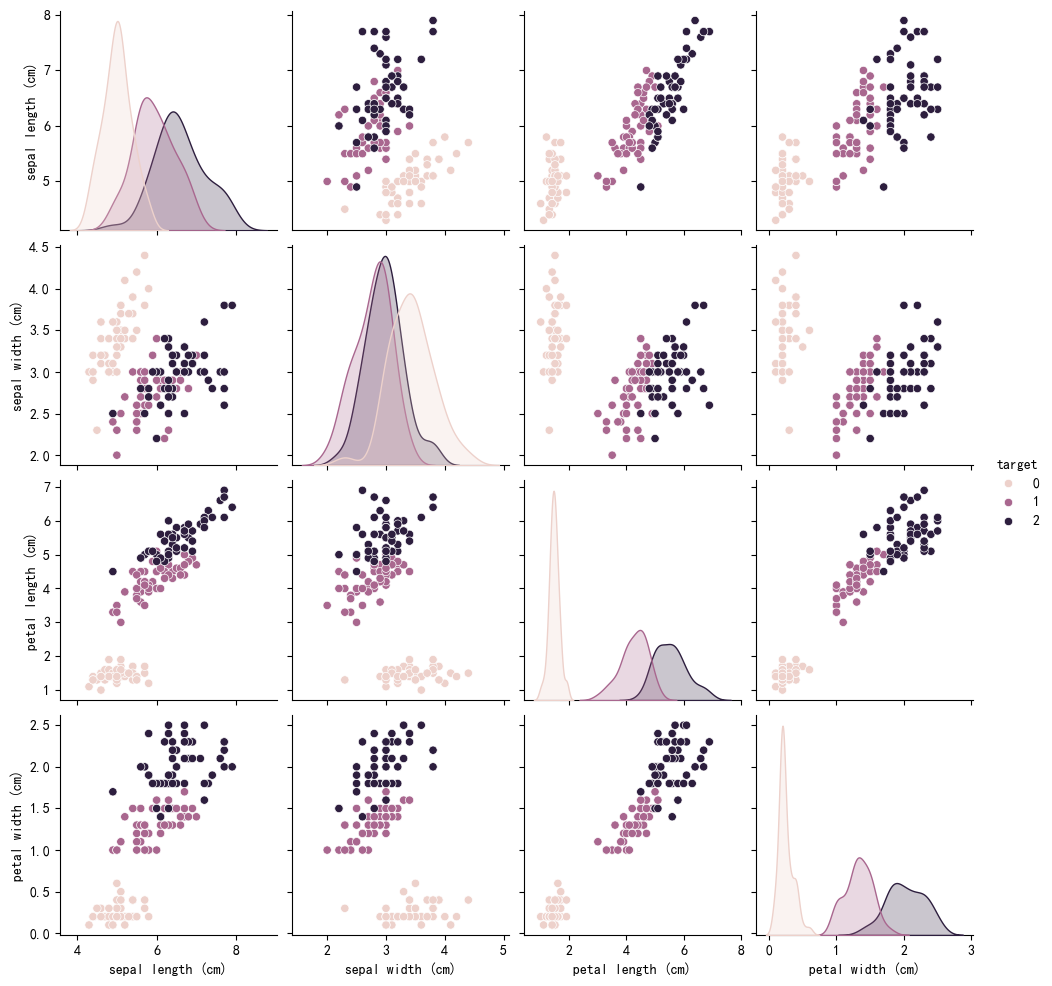

ID3 分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

ID3 混淆矩阵:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

CART 分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

CART 混淆矩阵:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

C4.5 分类报告:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10


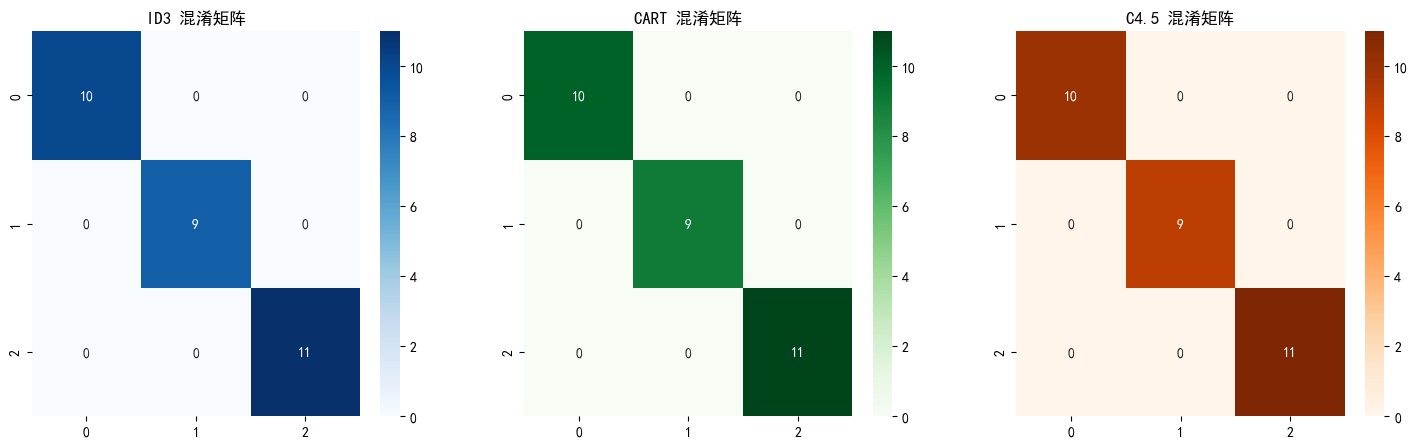

In [7]:
# 完整实现步骤（2）：导入鸢尾花数据集并使用三种不同的决策树分类方法（ID3，C4.5，CART）

# 导入所需的库
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为支持中文的字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体显示中文
rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


# 第一步：加载鸢尾花数据集
iris = datasets.load_iris()

# 创建DataFrame用于数据探索
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# 第二步：对数据进行初步探索（查看基本信息）
df_iris.info()
df_iris.describe()

# 可视化数据之间的关系
sns.pairplot(df_iris, hue='target')
plt.show()

# 第三步：将数据集分为训练集和测试集，按8:2的比例
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 第四步：分别使用三种决策树方法（ID3，C4.5，CART）训练模型
# ID3 和 CART 都可以用 DecisionTreeClassifier 实现，其中 criterion 分别为 'entropy' 和 'gini'
# 由于 sklearn 没有直接支持 C4.5，我们通过改进 ID3 方式来近似实现

# 分类器1：ID3 (使用 entropy 作为划分标准)
clf_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_id3.fit(X_train, y_train)

# 分类器2：CART (使用 gini 作为划分标准)
clf_cart = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_cart.fit(X_train, y_train)

# 分类器3：C4.5 使用的方式在 sklearn 中可以近似为使用 entropy + 限制 max_depth
clf_c45 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_c45.fit(X_train, y_train)

# 第五步：使用测试集进行预测
y_pred_id3 = clf_id3.predict(X_test)
y_pred_cart = clf_cart.predict(X_test)
y_pred_c45 = clf_c45.predict(X_test)

# 第六步：使用混淆矩阵和分类报告来评估分类器性能
print("ID3 分类报告:")
print(classification_report(y_test, y_pred_id3))
print("ID3 混淆矩阵:")
print(confusion_matrix(y_test, y_pred_id3))

print("\nCART 分类报告:")
print(classification_report(y_test, y_pred_cart))
print("CART 混淆矩阵:")
print(confusion_matrix(y_test, y_pred_cart))

print("\nC4.5 分类报告:")
print(classification_report(y_test, y_pred_c45))
print("C4.5 混淆矩阵:")
print(confusion_matrix(y_test, y_pred_c45))

# 第七步：对比较结果进行可视化
# 这里可以通过展示混淆矩阵的热力图来对比三种方法的效果
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_id3), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ID3 混淆矩阵")

sns.heatmap(confusion_matrix(y_test, y_pred_cart), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("CART 混淆矩阵")

sns.heatmap(confusion_matrix(y_test, y_pred_c45), annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("C4.5 混淆矩阵")

plt.show()
